In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import practice_code as pc
import individual_stats as ind

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
regular_clutch = pd.read_csv('regular_clutch.csv')

In [5]:
regular_clutch = regular_clutch.drop(['pts_difference',
       'winner', 'shots_made', 'shots_missed', 'total_rebound', 'FT_made',
       'off_rebound', 'FT_missed', 'total_blocks', 'assist_count', '3pt',
       '3pt_shots', 'Dunk/Layup', '2pter'], axis = 1)

In [6]:
regular_clutch= pc.add_columns(regular_clutch)

In [7]:
regular_clutch = pc.replace_nan(regular_clutch)

In [8]:
regular_clutch = pc.remove_not_imp_games(regular_clutch, 'game_id')

In [29]:
total_games = pc.get_total_games(regular_clutch)

In [30]:
total_games.head()

,player,total_games
260,Dirk Nowitzki,321
579,LeBron James,315
739,Paul Pierce,303
456,Joe Johnson,294
548,Kobe Bryant,289


In [10]:
x = total_games.sort_values('total_games', ascending=False)


In [11]:
x = pc.compare_players(regular_clutch, 'Dirk Nowitzki', 'Kobe Bryant')

In [12]:
player_stats_clutch = ind.object_to_int(regular_clutch, 'points')

/Users/deepak/capstone/clutch-baller/individual_stats.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  new_df = df.convert_objects(convert_numeric=True)


In [13]:
assists = ind.assist_stats(player_stats_clutch)
blks = ind.blk_stats(player_stats_clutch)
names = ind.player_names(player_stats_clutch)

In [14]:
full_clutch_stats = ind.merge_all(names, blks, assists, player_stats_clutch)
full_clutch_stats = ind.get_per_game_stats(full_clutch_stats)

In [15]:
ids = ind.add_ids(regular_clutch)
full_clutch_stats = ind.merge_ids(full_clutch_stats, ids)

In [43]:
x = ind.add_league_avg(full_clutch_stats)
y = ind.is_clutch(x)

/Users/deepak/capstone/clutch-baller/individual_stats.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['clutch_2pt'] = (df['2pt%'] > df['league_clutch_2pt_avg']) & (df['2fg_attempts']>35)
/Users/deepak/capstone/clutch-baller/individual_stats.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['clutch_3pt'] = (df['3pt%'] > df['league_clutch_3pt_avg']) & (df['3pt_shots']>25)
/Users/deepak/capstone/clutch-baller/individual_stats.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [44]:
y.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg,clutch_all_shots,clutch_2pt,clutch_3pt,clutch_hard2,clutch_easy2
1,Aaron Brooks,1.0,108,58,115,17,71,22,57,19,45,102,91,20,32,8,37,2,41,173,33.5,82.0,0.3,0.0,0.1,0.3,38.6,40.2,23.9,42.2,40.1,44.8,30.2,35.4,59.7,False,False,False,True,False
11,Al Harrington,11.0,143,73,131,12,70,37,67,24,67,134,71,32,28,36,111,1,61,204,35.8,68.9,0.2,0.0,0.3,0.8,55.2,45.5,17.1,35.8,40.1,44.8,30.2,35.4,59.7,False,True,False,True,False
12,Al Horford,12.0,150,86,76,3,13,34,52,49,97,149,76,33,24,47,183,27,83,162,53.1,69.7,0.2,0.2,0.3,1.2,65.4,55.7,23.1,50.5,40.1,44.8,30.2,35.4,59.7,True,True,False,True,True
13,Al Jefferson,13.0,202,178,192,3,9,63,82,112,279,361,79,38,24,80,245,39,175,370,48.1,67.5,0.1,0.2,0.4,1.2,76.8,48.5,33.3,40.1,40.1,44.8,30.2,35.4,59.7,True,True,False,True,True
26,Allen Iverson,26.0,135,92,131,15,50,38,62,39,111,173,120,25,71,6,44,2,77,223,41.3,82.8,0.5,0.0,0.0,0.3,61.3,44.5,30.0,35.1,40.1,44.8,30.2,35.4,59.7,True,False,False,False,True


In [19]:
z = y[(y['clutch_all_shots']==True) & (y['clutch_2pt']==True) & (y['clutch_3pt']==True) & (y['clutch_hard2']==True) & (y['clutch_easy2']==True)]
n = y[(y['clutch_all_shots']==True) | (y['clutch_2pt']==True) | (y['clutch_3pt']==True) | (y['clutch_hard2']==True) | (y['clutch_easy2']==True)]


In [38]:
x = (y[y['total_games']>82])

In [39]:
x.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg,clutch_all_shots,clutch_2pt,clutch_3pt,clutch_hard2,clutch_easy2
1,Aaron Brooks,1.0,108,58,115,17,71,22,57,19,45,102,91,20,32,8,37,2,41,173,33.5,82.0,0.3,0.0,0.1,0.3,38.6,40.2,23.9,42.2,40.1,44.8,30.2,35.4,59.7,False,False,False,True,False
11,Al Harrington,11.0,143,73,131,12,70,37,67,24,67,134,71,32,28,36,111,1,61,204,35.8,68.9,0.2,0.0,0.3,0.8,55.2,45.5,17.1,35.8,40.1,44.8,30.2,35.4,59.7,False,True,False,True,False
12,Al Horford,12.0,150,86,76,3,13,34,52,49,97,149,76,33,24,47,183,27,83,162,53.1,69.7,0.2,0.2,0.3,1.2,65.4,55.7,23.1,50.5,40.1,44.8,30.2,35.4,59.7,True,True,False,True,True
13,Al Jefferson,13.0,202,178,192,3,9,63,82,112,279,361,79,38,24,80,245,39,175,370,48.1,67.5,0.1,0.2,0.4,1.2,76.8,48.5,33.3,40.1,40.1,44.8,30.2,35.4,59.7,True,True,False,True,True
26,Allen Iverson,26.0,135,92,131,15,50,38,62,39,111,173,120,25,71,6,44,2,77,223,41.3,82.8,0.5,0.0,0.0,0.3,61.3,44.5,30.0,35.1,40.1,44.8,30.2,35.4,59.7,True,False,False,False,True


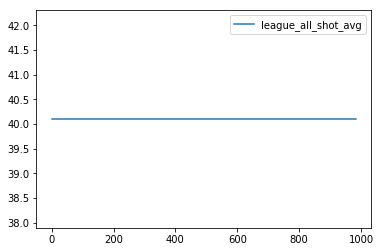

In [52]:
x.plot.line(y='league_all_shot_avg')

In [62]:
x.head()

,player,id,total_games,shots_made,shots_missed,3pt,3pt_shots,Dunk/Layup,Dunk/Layup_attempts,2pt_med/hard,med/hard_attempts,2fg_attempts,FT_made,FT_missed,assist_count,off_rebound,total_rebound,total_blocks,2pt_fg_made,total_shots,shooting%,FT%,APG,BPG,ORPG,RPG,easy_shot%,2pt%,3pt%,med/hard_fg%,league_all_shot_avg,league_2pt_avg,league_3pt_avg,league_hard2pt_avg,league_easy2pt_avg
0,A.J. Price,0.0,16,11,17,3,10,2,5,6,13,18,3,0,6,1,6,0,8,28,39.3,100.0,0.4,0.0,0.1,0.4,40.0,44.4,30.0,46.2,40.1,44.8,30.2,35.4,59.7
1,Aaron Brooks,1.0,108,58,115,17,71,22,57,19,45,102,91,20,32,8,37,2,41,173,33.5,82.0,0.3,0.0,0.1,0.3,38.6,40.2,23.9,42.2,40.1,44.8,30.2,35.4,59.7
2,Aaron Gordon,2.0,17,5,6,1,3,3,7,1,1,8,8,1,3,7,28,3,4,11,45.5,88.9,0.2,0.2,0.4,1.6,42.9,50.0,33.3,100.0,40.1,44.8,30.2,35.4,59.7
3,Aaron Gray,3.0,14,4,2,0,0,3,3,1,3,6,6,5,2,8,18,0,4,6,66.7,54.5,0.1,0.0,0.6,1.3,100.0,66.7,0.0,33.3,40.1,44.8,30.2,35.4,59.7
4,Aaron McKie,4.0,7,0,3,0,1,0,0,0,2,2,0,0,0,5,6,0,0,3,0.0,0.0,0.0,0.0,0.7,0.9,0.0,0.0,0.0,0.0,40.1,44.8,30.2,35.4,59.7


In [63]:
d= x[['league_all_shot_avg', 'league_3pt_avg', 'league_2pt_avg']]

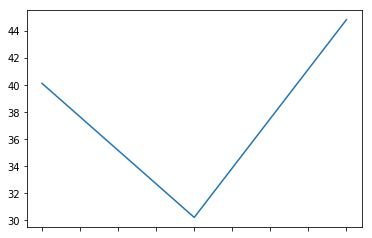

In [67]:
d.iloc[0].plot(y='value')


(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([30.2 , 31.66, 33.12, 34.58, 36.04, 37.5 , 38.96, 40.42, 41.88,
        43.34, 44.8 ]),
 <a list of 10 Patch objects>)

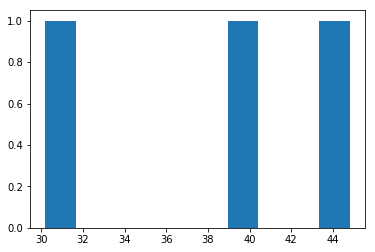

In [68]:
plt.hist(x=d.iloc[0])